In [1]:
import matplotlib.pyplot as plt

import numpy as np

# Arithmetic Intensity of SwiGLU FFN layers

295 is the intensity of a H100.

batch size in this context can be also prefill. 

Because for feedforward layers it does not matter, if it is in the batch or the sequence dimension.

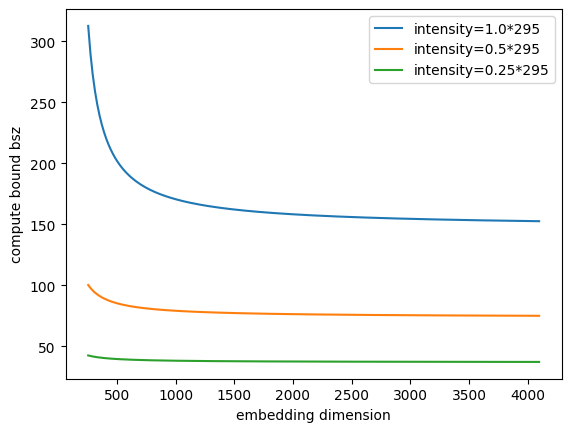

In [2]:
# At which batch size is a SwiGLU feed forward layer compute bound? for fp8
dimension = np.linspace(256, 4096, 200)
intensity_nom = 295

for fac in np.array([1.0, 0.5,0.25]):
    intensity = fac * intensity_nom
    cmp_bound_bsz = (12*dimension**2*intensity) / (24*dimension**2 - 11 * dimension * intensity)

    plt.plot(dimension, cmp_bound_bsz, label=f"intensity={fac}*{intensity_nom}")

plt.xlabel("embedding dimension")
plt.ylabel("compute bound bsz")
plt.legend()


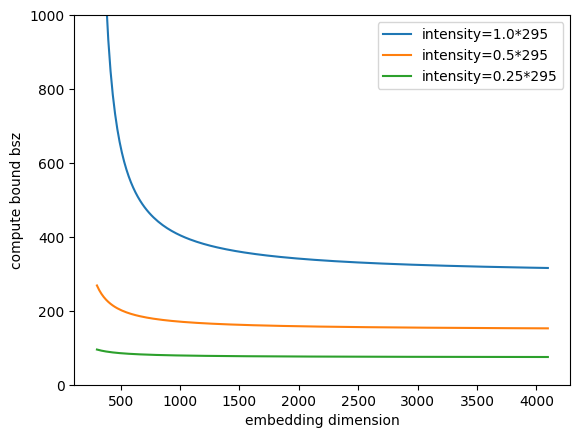

In [6]:
# At which batch size is a SwiGLU feed forward layer compute bound? for bf16
dimension = np.linspace(300, 4096, 200)
intensity_nom = 295

for fac in np.array([1.0, 0.5,0.25]):
    intensity = fac * intensity_nom
    cmp_bound_bsz = (24*dimension**2*intensity) / (24*dimension**2 - 22 * dimension * intensity)

    plt.plot(dimension, cmp_bound_bsz, label=f"intensity={fac}*{intensity_nom}")

plt.xlabel("embedding dimension")
plt.ylabel("compute bound bsz")
plt.ylim(0,1000)
plt.legend()

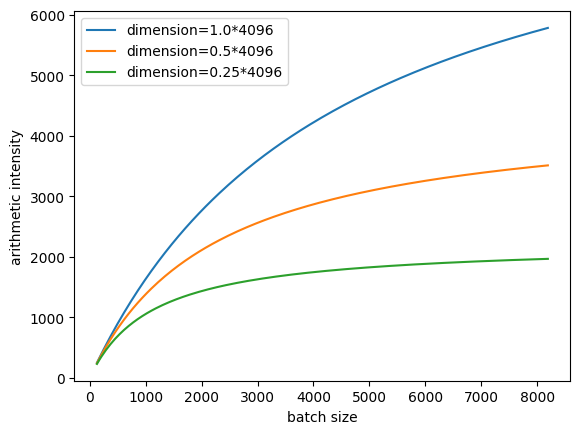

In [ ]:
# What is the arithmetic intensity of a SwiGLU feed forward layer for specific batch sizes? fp8
bsz = np.linspace(128, 8192, 200)
dimension_nom = 4096

for fac in np.array([1.0, 0.5,0.25]):
    dimension = fac * dimension_nom
    intensity = (24 * bsz * dimension**2) / (12 * dimension**2 + 11 * bsz * dimension)

    plt.plot(bsz, intensity, label=f"dimension={fac}*{dimension_nom}")

plt.xlabel("batch size")
plt.ylabel("arithmetic intensity")
plt.legend()
